# Report

---

## Learning Algorithm
I utilized DDPG algorithm with Actor Critic Model to solve this environment.

In the Actor Critic Model :

- The Actor branch outputs actions (-1 to 1)
- The Critic branch ouputs the state value with given actions. Actions nodes are concatenated to input nodes after the first fully connnected layer.

Two identical Actor Critic Models are initiated in the agent.
    - We train and back-propagate the local model
    - Use target model as anchor point to evaluate and thus train our local model
        - Target model is updated with a soft update.
    
During training, 
    - Actor loss is aimed to maximize the state value with given actions.
    - Critic loss is aim to minimize the Mean Squared Error between target state value and local state value

## Hyperparameters¶
All hyperparameters are saved in params.txt, below are the details of hyperparameters chosen for my implementation:

In [56]:
agent = Agent(params_dir=params_dir,
              state_size=state_size, 
              action_size=action_size, 
              num_agents=num_agents, 
              device=device)
for p, value in agent.params.items():
    print(f"{p}: {value}")

batch_size: 1024
hidden_dim: 400
n_episodes: 5000
gamma: 0.99
seed: 35
actor_h_num: 1
critic_h_num: 1
actor_lr: 0.0001
critic_lr: 0.001
update_freq: 10
buffer_size: 100000
TAU: 0.001
working_dir: ./weights.pth


## Model Architechture:

Below is the detail of the Model Architecture for both Actor and Critic Branch

In [48]:
print(f"Actor Architecture:  {agent.model.actor}")
print(f"Critic Architecture: {agent.model.critic}")

Actor Architecture:  ModuleList(
  (0): Sequential(
    (fc_layer_1): Linear(in_features=24, out_features=400, bias=True)
    (RELU_layer_1): ReLU()
  )
  (1): Sequential(
    (fc_layer_1): Linear(in_features=400, out_features=300, bias=True)
    (RELU_layer_1): ReLU()
  )
  (2): Sequential(
    (out_put_layer): Sequential(
      (0): Linear(in_features=300, out_features=2, bias=True)
    )
    (Tanh_out): Tanh()
  )
)
Critic Architecture: ModuleList(
  (0): Sequential(
    (fc_layer_1): Linear(in_features=24, out_features=400, bias=True)
    (RELU_layer_1): ReLU()
  )
  (1): Sequential(
    (fc_layer_1): Linear(in_features=402, out_features=300, bias=True)
    (RELU_layer_1): ReLU()
  )
  (2): Sequential(
    (out_put_layer): Sequential(
      (0): Linear(in_features=300, out_features=1, bias=True)
    )
  )
)


## Plot of Rewards

In [47]:
score_list = train(agent)

learned_steps: 20: Moving Average: 0.0  Max Score: 0.0
learned_steps: 40: Moving Average: 0.0  Max Score: 0.0
learned_steps: 60: Moving Average: 0.0  Max Score: 0.0
learned_steps: 80: Moving Average: 0.0  Max Score: 0.0
learned_steps: 100: Moving Average: 0.0  Max Score: 0.0
learned_steps: 120: Moving Average: 0.0  Max Score: 0.0
learned_steps: 140: Moving Average: 0.0  Max Score: 0.0
learned_steps: 160: Moving Average: 0.0020000000298023225  Max Score: 0.10000000149011612
learned_steps: 180: Moving Average: 0.0030000000447034836  Max Score: 0.10000000149011612
learned_steps: 200: Moving Average: 0.0030000000447034836  Max Score: 0.10000000149011612
learned_steps: 220: Moving Average: 0.0030000000447034836  Max Score: 0.10000000149011612
learned_steps: 240: Moving Average: 0.0030000000447034836  Max Score: 0.10000000149011612
learned_steps: 260: Moving Average: 0.0010000000149011613  Max Score: 0.10000000149011612
learned_steps: 280: Moving Average: 0.0  Max Score: 0.10000000149011612


Final Mean score: 0.5051000075973571


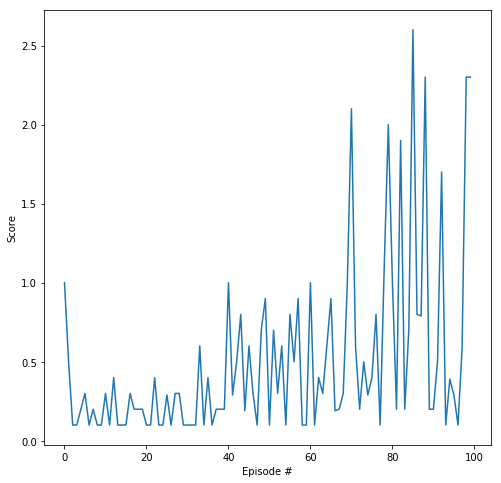

In [55]:
import matplotlib.pyplot as plt
def plot_scores(scores):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    
# Plot the score
print(f"Final Mean score: {np.mean(score_list)}")
plot_scores(score_list)

## Ideas for Future Work

    1. Current model is actually very unstable, I trained the model multiple times to solve this environment. Therefore I want to try other more stable Algorithms such as MADDPG or A3C.
    2.Add Entropy loss into our loss function to allow more exploration in our model
    3.Will try to add BatchNorm1d layer Leaky ReLU layer to replace to ReLU layer to see if gets better performance